<a href="https://colab.research.google.com/github/nsoukouna3/Machine-Learning/blob/main/Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("insurance.csv")

In [63]:
print(data)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [64]:
data["sex"] = data["sex"].astype("category")
data["sex"]= data["sex"].cat.codes
print(data)

      age  sex   bmi  children smoker     region  expenses
0      19    0  27.9         0    yes  southwest  16884.92
1      18    1  33.8         1     no  southeast   1725.55
2      28    1  33.0         3     no  southeast   4449.46
3      33    1  22.7         0     no  northwest  21984.47
4      32    1  28.9         0     no  northwest   3866.86
...   ...  ...   ...       ...    ...        ...       ...
1333   50    1  31.0         3     no  northwest  10600.55
1334   18    0  31.9         0     no  northeast   2205.98
1335   18    0  36.9         0     no  southeast   1629.83
1336   21    0  25.8         0     no  southwest   2007.95
1337   61    0  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [65]:
data["smoker"]= data["smoker"].astype("category")
data["smoker"]= data["smoker"].cat.codes
print(data)

      age  sex   bmi  children  smoker     region  expenses
0      19    0  27.9         0       1  southwest  16884.92
1      18    1  33.8         1       0  southeast   1725.55
2      28    1  33.0         3       0  southeast   4449.46
3      33    1  22.7         0       0  northwest  21984.47
4      32    1  28.9         0       0  northwest   3866.86
...   ...  ...   ...       ...     ...        ...       ...
1333   50    1  31.0         3       0  northwest  10600.55
1334   18    0  31.9         0       0  northeast   2205.98
1335   18    0  36.9         0       0  southeast   1629.83
1336   21    0  25.8         0       0  southwest   2007.95
1337   61    0  29.1         0       1  northwest  29141.36

[1338 rows x 7 columns]


In [66]:
data["region"]= data["region"].astype("category")
data["region"]= data["region"].cat.codes
print(data)

      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       1  10600.55
1334   18    0  31.9         0       0       0   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       3   2007.95
1337   61    0  29.1         0       1       1  29141.36

[1338 rows x 7 columns]


In [67]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [68]:
x= data.drop(columns="expenses")
print(x)

      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]


In [69]:
y= data["expenses"]
print(y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)


In [71]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predict = regressor.predict(x_train)

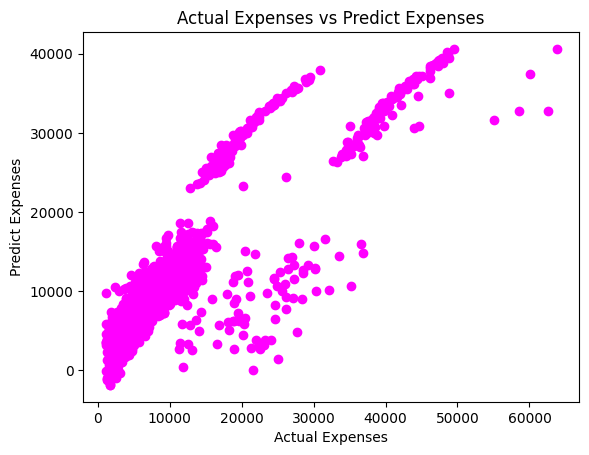

In [78]:
plt.scatter(y_train,y_predict, color="magenta")

plt.title("Actual Expenses vs Predict Expenses")
plt.xlabel("Actual Expenses")
plt.ylabel("Predict Expenses")
plt.show()

In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_predict))

0.7368404516664875


In [80]:
y_test_predict =regressor.predict(x_test)

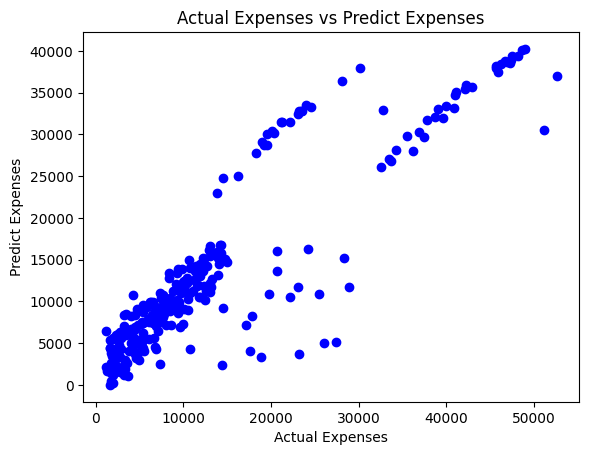

In [82]:
plt.scatter(y_test,y_test_predict, color="blue")
plt.title("Actual Expenses vs Predict Expenses")
plt.xlabel("Actual Expenses")
plt.ylabel("Predict Expenses")
plt.show()

In [83]:
print(r2_score(y_test, y_test_predict))

0.7999053396503137
